# Access to Financial Markets
1. This notebook studies what determines whether a household has access to financial markets

In [117]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

plt.style.use('ggplot')

sys.path.append('/home/mitch/github/ENIGH/')
import src.utils as utils
import src.json_utils as json_utils

processed = '/home/mitch/Dropbox/data/mexico_enigh/processed2'
dicts = '/home/mitch/github/ENIGH/dicts/'
#sys.path.append('/home/mitch/school/data/mexico_enigh/src/')
os.chdir(processed)
df = pd.read_csv('data.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20399 entries, 0 to 20398
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   consumption_current                                      20399 non-null  float64
 1   location_size                                            20399 non-null  int64  
 2   hhid                                                     20399 non-null  int64  
 3   consumption_food                                         20399 non-null  float64
 4   income_current                                           20399 non-null  float64
 5   hh_size                                                  20399 non-null  int64  
 6   consumption_total                                        20399 non-null  float64
 7   consumption_personal                                     20399 non-null  float64
 8   consumption_clothing      

In [119]:
df

,consumption_current,location_size,hhid,consumption_food,income_current,hh_size,consumption_total,consumption_personal,consumption_clothing,income_business,...,has_income_interest_fixed_investments,has_income_interest_loans_to_third_parties,has_income_interest_savings_accounts,has_income_interest_shares_bonds,has_income_land_landrental,has_income_realestate_mortgage,has_income_rental_houses_buildings_other_realestate,has_income_rental_trademarks_patents_copyrights,has_income_securities_bonds,has_income_withdrawal_savings
0,34.000119,1,19940110010,5.867128,42.056359,9,43.547649,2.776740,4.182728,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44.265249,1,19940110030,17.903154,57.175044,3,44.265249,3.248377,3.667275,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55.064614,1,19940110040,12.873225,69.337660,6,62.225261,5.401430,5.225568,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55.399681,1,19940110060,20.684452,90.692570,5,67.675077,1.282063,0.102295,15.344245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,122.300197,1,19940110070,35.560885,137.970678,6,149.621478,11.995534,11.346217,38.360613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,31.639798,1,19963399020,14.840565,35.994922,4,31.639798,1.921662,0.498830,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20395,25.491084,1,19963399030,8.360638,29.655967,4,25.554874,0.830044,0.285046,20.793398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20396,11.946668,1,19963399040,3.824656,14.379203,7,13.054307,1.477268,0.408860,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20397,89.016606,2,19963399060,18.984631,83.558445,3,89.016606,16.855481,2.299444,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
capital_expenditures = pd.read_csv('capital_expenditures.csv')
capital_expenditures.info()

In [ ]:
capital_income = pd.read_csv('capital_income.csv')
capital_income.info()

In [ ]:
df = df.merge(capital_expenditures, on='hhid', how='left')
df[capital_expenditures.columns] = df[capital_expenditures.columns].fillna(value=0)

In [ ]:
df = df.merge(capital_income, on='hhid', how='left')
df[capital_income.columns] = df[capital_income.columns].fillna(value=0)

In [120]:
df['post'] = df['Y'] == 1996

In [121]:
import statsmodels.stats.weightstats as ws
def get_deciles(x, weights=None):
    stats = ws.DescrStatsW(x, weights=weights)

    deciles =  np.arange(0.1, 1.1, .1)
    income_deciles = stats.quantile(deciles).values
    x_deciles = np.array([np.argmax(income_deciles > xi) for xi in x])
    return x_deciles + 1

print(len(df))
deciles = []
for Y in np.sort(df.Y.unique()):
    data = df.query('Y == @Y')[['hhid', 'income', 'weight']]
    data['decile'] = get_deciles(data['income'], data['weight'])
    data['Y'] = Y
    deciles.append(data)
deciles = pd.concat(deciles)
df = df.merge(deciles[['hhid', 'Y', 'decile']], on=['hhid', 'Y'], how='outer')

20399


In [122]:
expense_labels = json_utils.load_json(dicts + 'expense_labels.json')
expense_labels

{'has_expense_credit_card_payments': 'Credit Card',
 'has_expense_debt_to_work_or_person': 'Debts',
 'has_expense_deposits_savings': 'Deposits / Savings',
 'has_expense_foreigncurrencies_perciousmetals_art': 'Foreign Currencies/ Precious Metals/ Art',
 'has_expense_hhbusiness_machinery_animal_equipment': 'Business: Machinary/ Animal/ Equipment',
 'has_expense_hhbusiness_negative_balance': 'Business: Negative balance',
 'has_expense_life_insurance': 'Life Insurance',
 'has_expense_loans_to_third_parties': 'Loans to Others',
 'has_expense_other': 'Other',
 'has_expense_realestate_hh_inhabit': 'Real Estate (Inhabited)',
 'has_expense_realestate_hh_not_inhabit': 'Real Estate (Not Inhabited)',
 'has_expense_realestate_mortgage': 'Real Estate (Mortgage)',
 'has_expense_securities_shares_bond': 'Securities / Bonds',
 'has_expense_trademarks_patents_copyrights': 'Trademarks / Patents / Copyrights',
 'has_expense_inheritance_dowrie_legacies': 'Inheritance / Dowrie / Legacy',
 'has_income_coins_

In [123]:
df

,consumption_current,location_size,hhid,consumption_food,income_current,hh_size,consumption_total,consumption_personal,consumption_clothing,income_business,...,has_income_interest_savings_accounts,has_income_interest_shares_bonds,has_income_land_landrental,has_income_realestate_mortgage,has_income_rental_houses_buildings_other_realestate,has_income_rental_trademarks_patents_copyrights,has_income_securities_bonds,has_income_withdrawal_savings,post,decile
0,34.000119,1,19940110010,5.867128,42.056359,9,43.547649,2.776740,4.182728,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,5
1,44.265249,1,19940110030,17.903154,57.175044,3,44.265249,3.248377,3.667275,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,6
2,55.064614,1,19940110040,12.873225,69.337660,6,62.225261,5.401430,5.225568,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,6
3,55.399681,1,19940110060,20.684452,90.692570,5,67.675077,1.282063,0.102295,15.344245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,8
4,122.300197,1,19940110070,35.560885,137.970678,6,149.621478,11.995534,11.346217,38.360613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,31.639798,1,19963399020,14.840565,35.994922,4,31.639798,1.921662,0.498830,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,5
20395,25.491084,1,19963399030,8.360638,29.655967,4,25.554874,0.830044,0.285046,20.793398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,3
20396,11.946668,1,19963399040,3.824656,14.379203,7,13.054307,1.477268,0.408860,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,1
20397,89.016606,2,19963399060,18.984631,83.558445,3,89.016606,16.855481,2.299444,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,7


In [124]:
has_expense_columns = [x for x in df.columns if ('has_expense' in x)]
has_expense = pd.DataFrame(index=has_expense_columns)

has_expense['percent'] = [
    100 * np.average(df[x], axis=0, weights=df['weight'])
    for x in has_expense_columns
]
has_expense = has_expense.sort_values('percent', ascending=False)
df['has_expense_any'] = (df[has_expense_columns].astype(int).sum(axis=1) > 0) + 0
has_expense

,percent
has_expense_deposits_savings,31.409754
has_expense_credit_card_payments,8.665196
has_expense_debt_to_work_or_person,7.835113
has_expense_hhbusiness_negative_balance,3.972942
has_expense_loans_to_third_parties,3.080558
has_expense_foreigncurrencies_perciousmetals_art,1.089991
has_expense_hhbusiness_machinery_animal_equipment,0.982663
has_expense_life_insurance,0.907522
has_expense_realestate_hh_not_inhabit,0.820270
has_expense_realestate_hh_inhabit,0.398113


Text(0.5, 1.0, 'Financial Expenses')

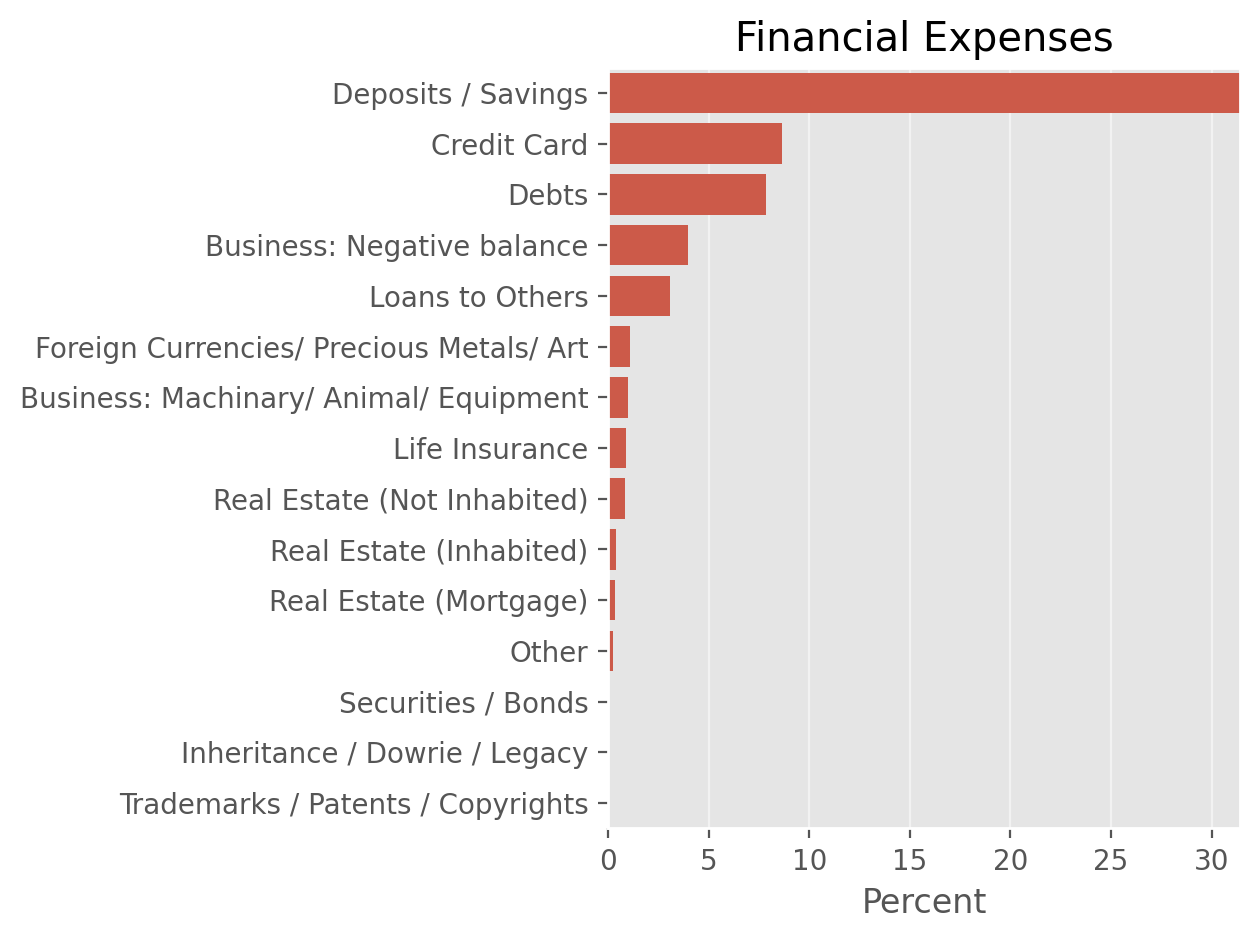

In [125]:
labels = [expense_labels[x] for x in has_expense.index.values]
sns.barplot(y = labels , x= has_expense['percent'], 
            orient='h')
plt.xlabel('Percent')
plt.title('Financial Expenses')

In [126]:
has_income_columns = [x for x in df.columns if ('has_income' in x)]
has_income = pd.DataFrame(index=has_income_columns)

has_income['percent'] = [
    100 * np.average(df[x], axis=0, weights=df['weight'])
    for x in has_income_columns
]
has_income = has_income.sort_values('percent', ascending=False)
df['has_income_any'] = (df[has_income_columns].sum(axis=1) > 0) + 0
has_income

,percent
has_income_from_loans_to_third_parties_not_in_household,8.168661
has_income_withdrawal_savings,6.634913
has_income_coins_preciousmetals_art,5.111892
has_income_from_loans_to_institutions_not_mortgage,4.355619
has_income_rental_houses_buildings_other_realestate,1.558063
has_income_interest_savings_accounts,0.473548
has_income_land_landrental,0.419380
has_income_interest_fixed_investments,0.323135
has_income_hhbusiness_machinery_animal_equipment,0.229249
has_income_house_land_condiminum,0.226876


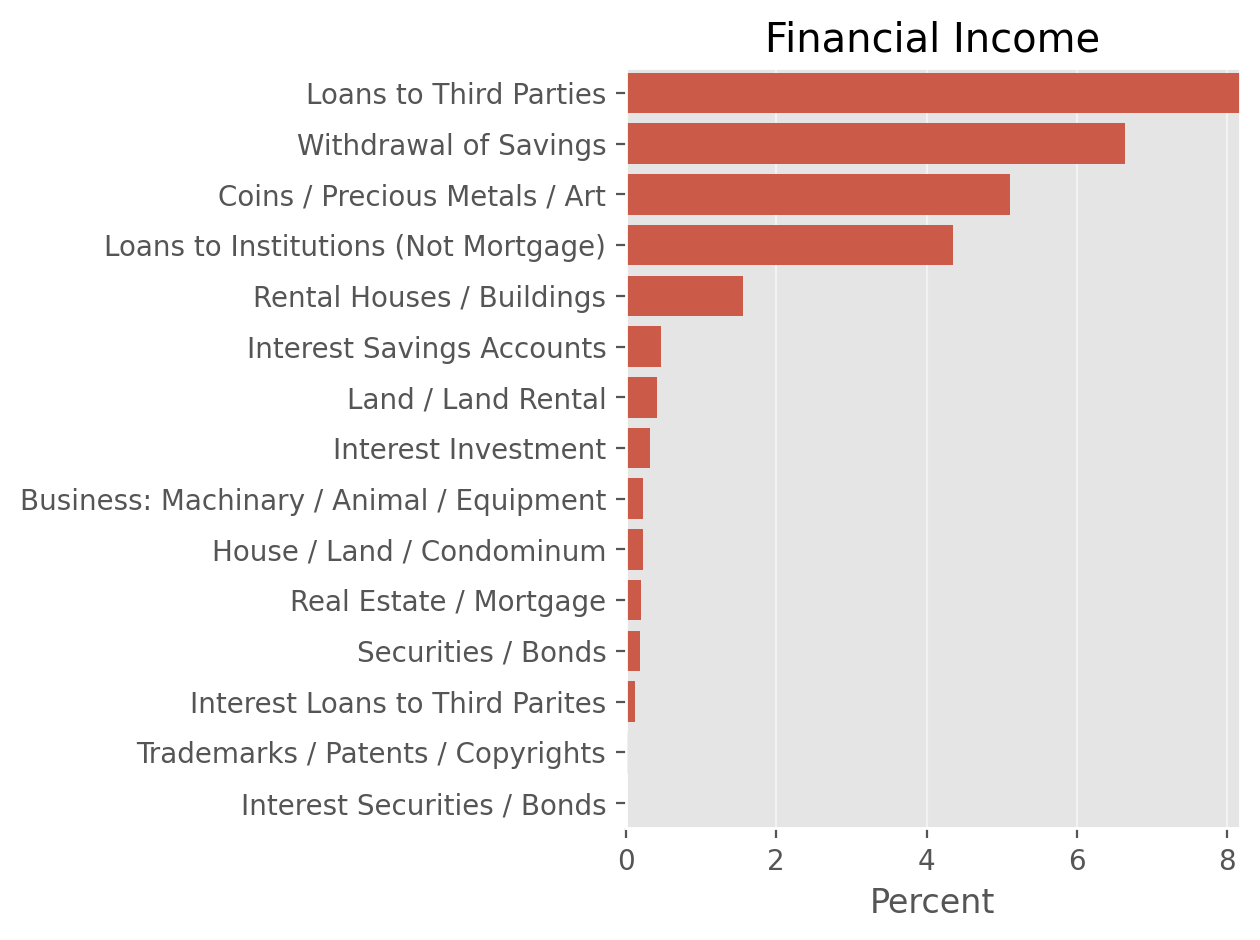

In [127]:
labels = [expense_labels[x] for x in has_income.index.values]
sns.barplot(y = labels , x= has_income['percent'], 
            orient='h')
plt.title('Financial Income')
plt.xlabel('Percent');

In [128]:
df['included'] = df['has_expense_any'] | df['has_income_any']

In [130]:
df['included'] = df['included'].replace({0:'N', 1:'Y'})

In [132]:
included_by_decile = (100*pd.crosstab(df.decile, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
included_by_decile = included_by_decile.melt(id_vars='decile', var_name='Included', value_name='Percent')
included_by_decile

,decile,Included,Percent
0,1,N,61.038350
1,2,N,62.469828
2,3,N,61.102958
3,4,N,62.630149
4,5,N,55.041730
5,6,N,55.041154
6,7,N,49.490655
7,8,N,41.984325
8,9,N,32.563330
9,10,N,18.222817


<Axes: xlabel='decile', ylabel='Percent'>

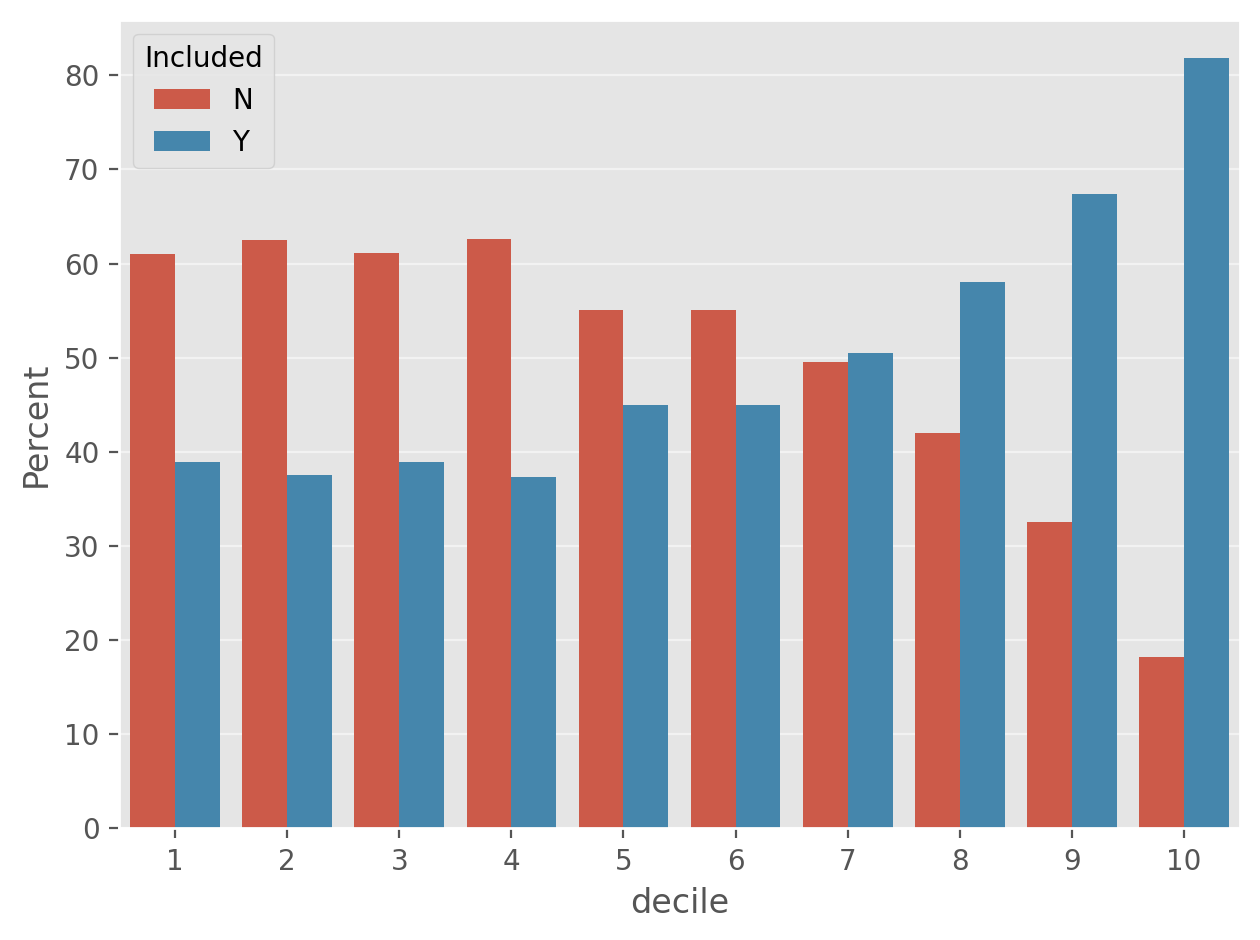

In [135]:
sns.barplot(included_by_decile, x='decile', hue='Included', y='Percent')

In [136]:
df['education'] = pd.Categorical(df['education']).reorder_categories(['Low', 'Medium', 'High'])

included_by_education = (100*pd.crosstab(df.education, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
included_by_education = included_by_education.melt(id_vars='education', var_name='Included', value_name='Percent')
included_by_education

,education,Included,Percent
0,Low,N,56.349005
1,Medium,N,47.299008
2,High,N,26.465562
3,Low,Y,43.650995
4,Medium,Y,52.700992
5,High,Y,73.534438


<Axes: xlabel='education', ylabel='Percent'>

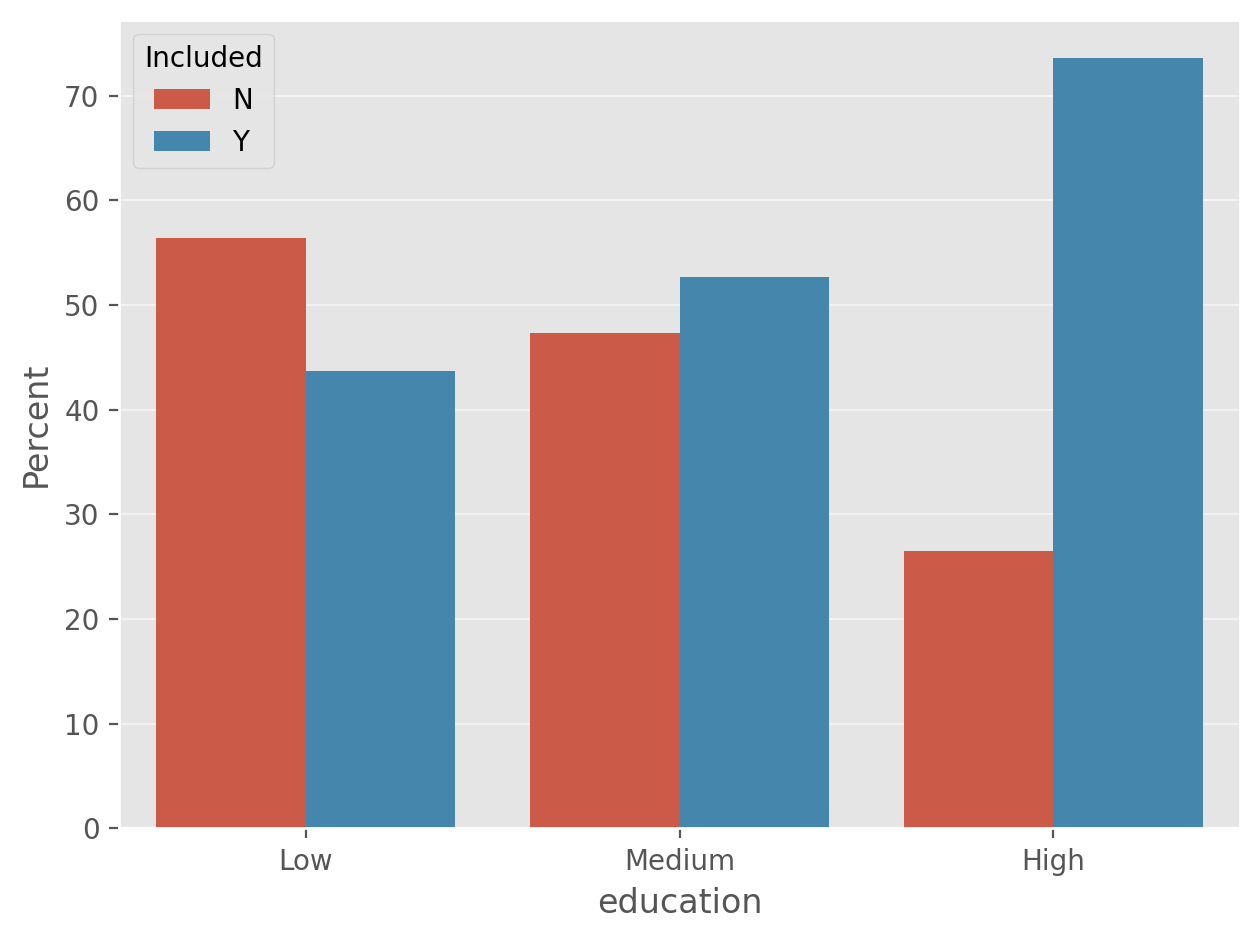

In [137]:
sns.barplot(included_by_education, x='education', y='Percent', hue='Included')

In [138]:
included_by_location_size = (100*pd.crosstab(df.location_size, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
included_by_location_size = included_by_location_size.melt(id_vars='location_size', var_name='Included', value_name='Percent')
included_by_location_size

,location_size,Included,Percent
0,1,N,47.532390
1,2,N,51.340962
2,3,N,51.629256
3,4,N,53.689808
4,1,Y,52.467610
5,2,Y,48.659038
6,3,Y,48.370744
7,4,Y,46.310192


/tmp/ipykernel_19451/40392231.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(location_labels.values())


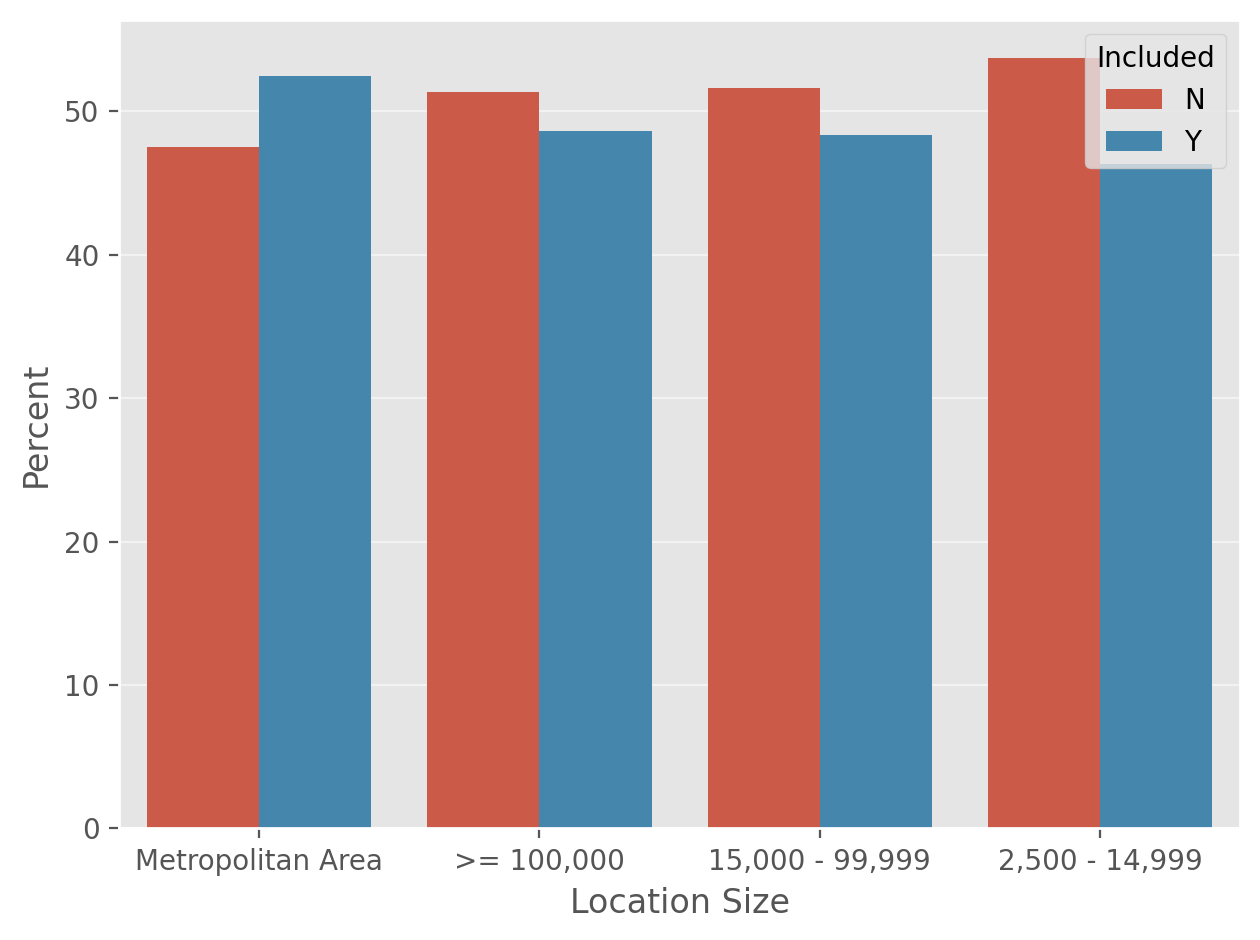

In [139]:
os.chdir(dicts)
location_labels = json_utils.load_json('location_labels.json')

ax = sns.barplot(included_by_location_size, x='location_size', y='Percent', hue='Included')
ax.set_ylabel('Percent')
ax.set_xticklabels(location_labels.values())
ax.set_xlabel('Location Size');

<Axes: xlabel='hh_size', ylabel='percent'>

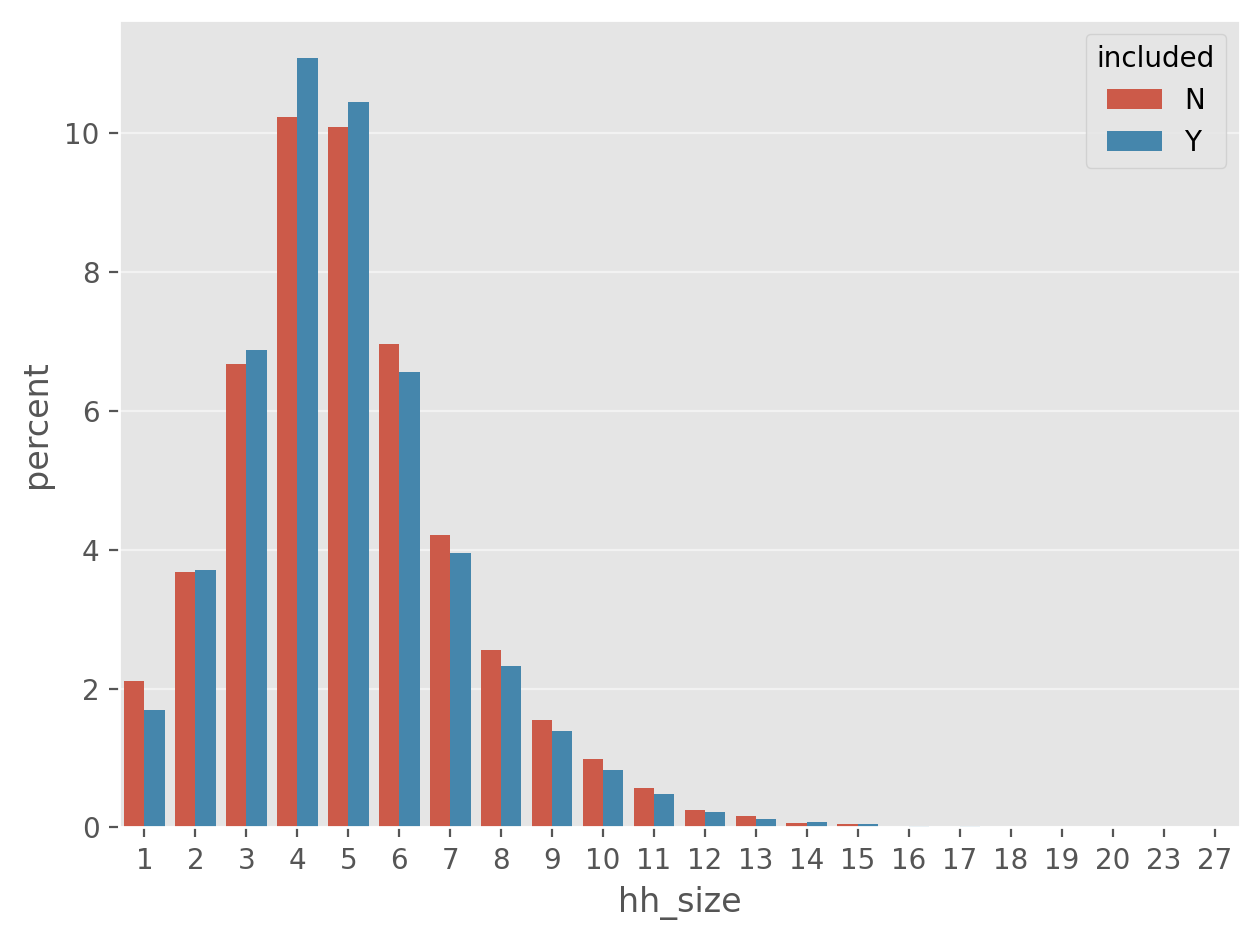

In [140]:
sns.countplot(df, x='hh_size', hue='included', stat='percent')

<Axes: xlabel='count', ylabel='location'>

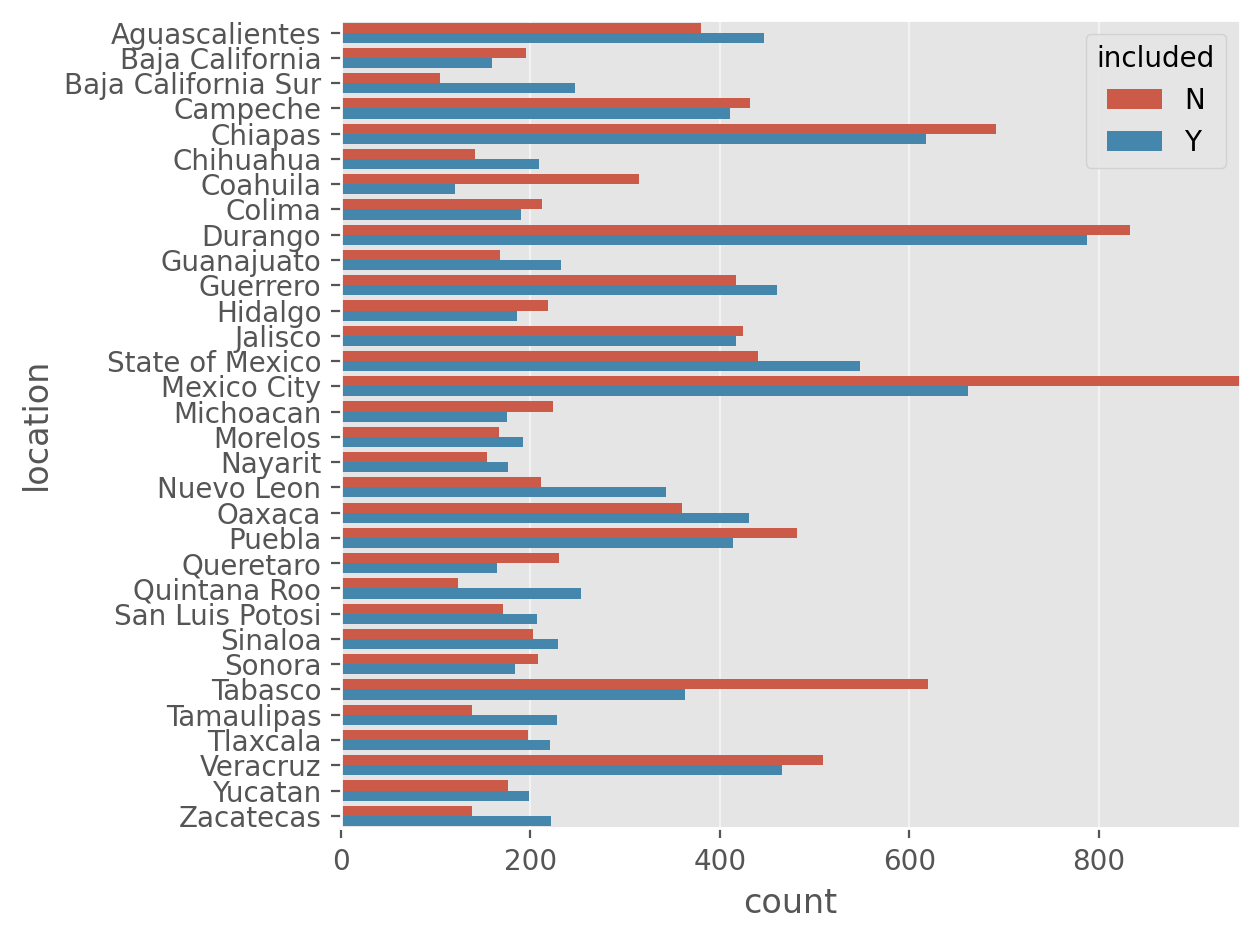

In [141]:
sns.countplot(df, y= 'location', hue='included', orient='h')

<Axes: xlabel='included', ylabel='age'>

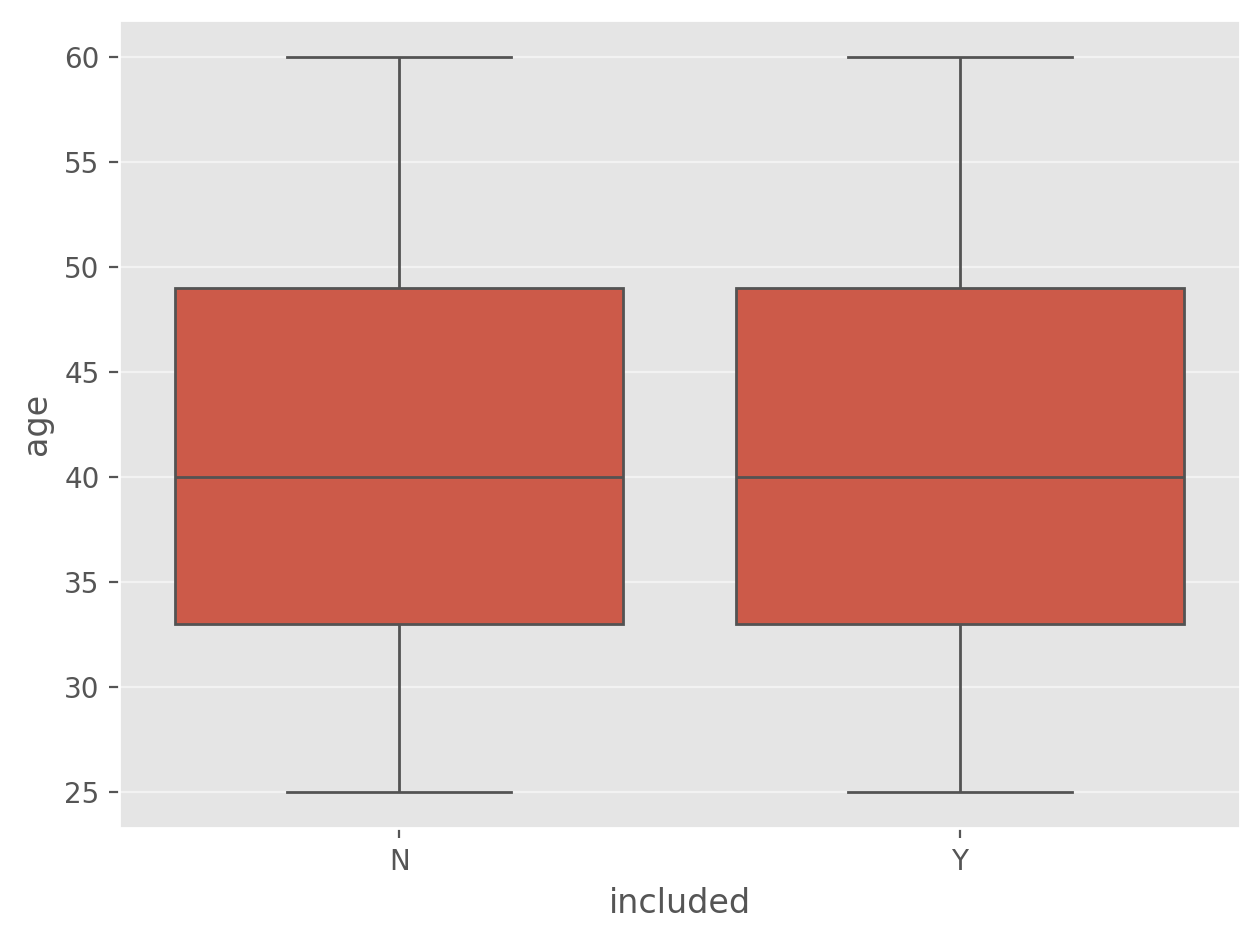

In [142]:
sns.boxplot(
    df, x='included', y='age'
)

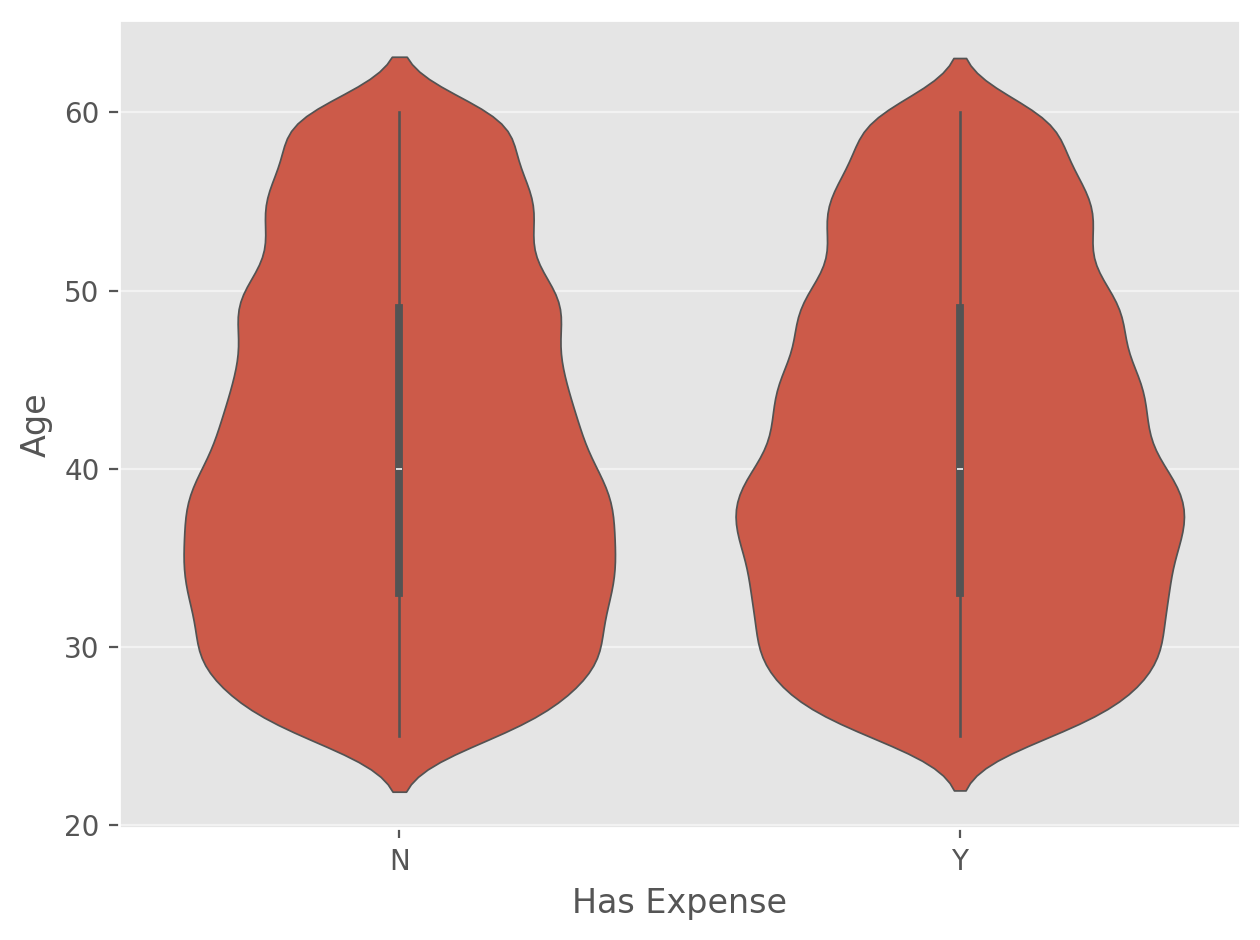

In [143]:
sns.violinplot(df, 
               x='included', y='age')
plt.xlabel('Has Expense')
plt.ylabel('Age');

In [101]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as ws

from statsmodels.genmod.families.links import probit, identity
probit_model = sm.families.Binomial(probit()) # basic probit model
linear_model = sm.families.Gaussian(identity()) # basic linear model

/home/mitch/envs/main/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/mitch/envs/main/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [108]:
y = 'has_expense_deposits_savings'
Z = '~ C(decile) + age + I(age**2) + C(education) + C(sex) + C(location)'
D = ' + C(Y)'

reg = y + Z + D

models = {}

models['deposits'] = smf.glm('has_expense_deposits_savings' + Z + D, df, missing='drop', freq_weights=df['weight'], family=probit_model).fit()
models['creditcard'] = smf.glm('has_expense_credit_card_payments' + Z + D, df, missing='drop', freq_weights=df['weight'], family=probit_model).fit()
models['has_expense_any'] = smf.glm('has_expense_any' + Z + D, df, missing='drop', freq_weights=df['weight'], family=probit_model).fit()

In [109]:
models['deposits'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                       
========================================================================================
Dep. Variable:     has_expense_deposits_savings   No. Observations:                20399
Model:                                      GLM   Df Residuals:                 30643520
Model Family:                          Binomial   Df Model:                           46
Link Function:                           probit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:            -1.7730e+07
Date:                          Tue, 16 Jan 2024   Deviance:                   3.5461e+07
Time:                                  14:41:24   Pearson chi2:                 3.06e+07
No. Iterations:                               6   Pseudo R-squ. (CS):              1.000
Covariance Type:                      nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.7808      0.005   -143.741      0.000      -0.791      -0.770
C(decile)[T.2]                         0.0634      0.001     52.573      0.000       0.061       0.066
C(decile)[T.3]                         0.2070      0.001    175.146      0.000       0.205       0.209
C(decile)[T.4]                         0.1641      0.001    135.957      0.000       0.162       0.166
C(decile)[T.5]                         0.4594      0.001    387.382      0.000       0.457       0.462
C(decile)[T.6]                         0.4657      0.001    391.166      0.000       0.463       0.468
C(decile)[T.7]                         0.6206      0.001    519.064      0.000       0.618       0.623
C(decile)[T.8]                         0.8095      0.001    675.370      0.000       0.807       0.812
C(decile)[T.9]                         0.8990      0.001    731.837      0.000       0.897       0.901
C(decile)[T.10]                        1.2163      0.001    923.428      0.000       1.214       1.219
C(education)[T.Medium]                -0.0543      0.001    -84.248      0.000      -0.056      -0.053
C(education)[T.High]                  -0.0277      0.001    -30.756      0.000      -0.029      -0.026
C(sex)[T.Male]                         0.1332      0.001    180.083      0.000       0.132       0.135
C(location)[T.Baja California]        -0.1039      0.003    -34.518      0.000      -0.110      -0.098
C(location)[T.Baja California Sur]     0.3003      0.004     69.449      0.000       0.292       0.309
C(location)[T.Campeche]                0.0996      0.004     25.910      0.000       0.092       0.107
C(location)[T.Chiapas]                -0.1711      0.003    -56.098      0.000      -0.177      -0.165
C(location)[T.Chihuahua]               0.2577      0.004     64.598      0.000       0.250       0.266
C(location)[T.Coahuila]               -0.3758      0.003   -126.831      0.000      -0.382      -0.370
C(location)[T.Colima]                 -0.1602      0.003    -54.761      0.000      -0.166      -0.154
C(location)[T.Durango]                -0.1437      0.003    -53.315      0.000      -0.149      -0.138
C(location)[T.Guanajuato]              0.2178      0.003     67.424      0.000       0.211       0.224
C(location)[T.Guerrero]                0.1644      0.003     57.976      0.000       0.159       0.170
C(location)[T.Hidalgo]                -0.1091      0.003    -36.643      0.000      -0.115      -0.103
C(location)[T.Jalisco]                 0.2826      0.003     93.209      0.000       0.277       0.289
C(location)[T.Mexico City]            -0.0315      0.003    -11.768      0.000      -0.03

In [110]:
models['creditcard'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                         
============================================================================================
Dep. Variable:     has_expense_credit_card_payments   No. Observations:                20399
Model:                                          GLM   Df Residuals:                 30643520
Model Family:                              Binomial   Df Model:                           46
Link Function:                               probit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:            -5.6184e+06
Date:                              Tue, 16 Jan 2024   Deviance:                   1.1237e+07
Time:                                      14:41:24   Pearson chi2:                 3.09e+07
No. Iterations:                                  11   Pseudo R-squ. (CS):              1.000
Covariance Type:                          nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -5.4011      0.010   -539.100      0.000      -5.421      -5.381
C(decile)[T.2]                        -0.2787      0.005    -56.105      0.000      -0.288      -0.269
C(decile)[T.3]                        -0.1259      0.004    -29.462      0.000      -0.134      -0.118
C(decile)[T.4]                        -0.0866      0.004    -21.006      0.000      -0.095      -0.079
C(decile)[T.5]                         0.2521      0.004     68.182      0.000       0.245       0.259
C(decile)[T.6]                         0.2555      0.004     70.047      0.000       0.248       0.263
C(decile)[T.7]                         0.5707      0.004    162.315      0.000       0.564       0.578
C(decile)[T.8]                         0.7716      0.003    222.610      0.000       0.765       0.778
C(decile)[T.9]                         1.1292      0.003    329.149      0.000       1.122       1.136
C(decile)[T.10]                        1.6551      0.003    479.772      0.000       1.648       1.662
C(education)[T.Medium]                 0.5349      0.001    459.929      0.000       0.533       0.537
C(education)[T.High]                   1.0598      0.001    833.526      0.000       1.057       1.062
C(sex)[T.Male]                         0.1524      0.001    118.221      0.000       0.150       0.155
C(location)[T.Baja California]        -0.2803      0.005    -61.955      0.000      -0.289      -0.271
C(location)[T.Baja California Sur]    -0.5184      0.007    -72.477      0.000      -0.532      -0.504
C(location)[T.Campeche]               -0.6198      0.008    -82.108      0.000      -0.635      -0.605
C(location)[T.Chiapas]                -0.1893      0.005    -41.265      0.000      -0.198      -0.180
C(location)[T.Chihuahua]              -0.3408      0.006    -53.017      0.000      -0.353      -0.328
C(location)[T.Coahuila]               -1.0922      0.006   -193.314      0.000      -1.103      -1.081
C(location)[T.Colima]                 -0.1371      0.004    -30.713      0.000      -0.146      -0.128
C(location)[T.Durango]                -0.0426      0.004    -10.705      0.000      -0.050      -0.035
C(location)[T.Guanajuato]              0.0499      0.005      9.969      0.000       0.040       0.060
C(location)[T.Guerrero]               -0.2648      0.005    -58.240      0.000      -0.274      -0.256
C(location)[T.Hidalgo]                -0.5332      0.005   -102.746      0.000      -0.543      -0.523
C(location)[T.Jalisco]                -1.0623      0.007   -150.891      0.000      -1.076      -1.049
C(location)[T.Mexico City]            -0.1472

In [111]:
models['has_expense_any'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Generalized Linear Model Regression Results                               
========================================================================================================
Dep. Variable:     ['has_expense_any[N]', 'has_expense_any[Y]']   No. Observations:                20399
Model:                                                      GLM   Df Residuals:                 30643520
Model Family:                                          Binomial   Df Model:                           46
Link Function:                                           probit   Scale:                          1.0000
Method:                                                    IRLS   Log-Likelihood:            -1.8755e+07
Date:                                          Tue, 16 Jan 2024   Deviance:                   3.7510e+07
Time:                                                  14:41:24   Pearson chi2:                 3.07e+07
No. Iterations:                                               6   Pseudo R-squ. (CS):              1.000
Covariance Type:                                      nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.1759      0.005    221.258      0.000       1.166       1.186
C(decile)[T.2]                        -0.0392      0.001    -35.638      0.000      -0.041      -0.037
C(decile)[T.3]                        -0.1407      0.001   -129.014      0.000      -0.143      -0.139
C(decile)[T.4]                        -0.1014      0.001    -91.165      0.000      -0.104      -0.099
C(decile)[T.5]                        -0.3719      0.001   -335.565      0.000      -0.374      -0.370
C(decile)[T.6]                        -0.3787      0.001   -340.318      0.000      -0.381      -0.376
C(decile)[T.7]                        -0.5456      0.001   -485.113      0.000      -0.548      -0.543
C(decile)[T.8]                        -0.7678      0.001   -674.904      0.000      -0.770      -0.766
C(decile)[T.9]                        -1.0169      0.001   -859.771      0.000      -1.019      -1.015
C(decile)[T.10]                       -1.4714      0.001  -1111.111      0.000      -1.474      -1.469
C(education)[T.Medium]                 0.0217      0.001     34.655      0.000       0.020       0.023
C(education)[T.High]                  -0.2033      0.001   -221.938      0.000      -0.205      -0.202
C(sex)[T.Male]                        -0.2509      0.001   -348.660      0.000      -0.252      -0.249
C(location)[T.Baja California]         0.3143      0.003    106.925      0.000       0.309       0.320
C(location)[T.Baja California Sur]    -0.2208      0.004    -50.145      0.000      -0.229      -0.212
C(location)[T.Campeche]                0.0750      0.004     20.037      0.000       0.068       0.082
C(location)[T.Chiapas]                 0.1921      0.003     65.252      0.000       0.186       0.198
C(location)[T.Chihuahua]              -0.2235      0.004    -55.942      0.000      -0.231      -0.216
C(location)[T.Coahuila]                0.5784      0.003    203.484      0.000       0.573       0.584
C(location)[T.Colima]                  0.2644      0.003     93.408      0.000       0.259       0.270
C(location)[T.Durango]                 0.3742      0.003    142.595      0.000       0.369       0.379
C(location)[T.Guanajuato]             -0.1855      0.003    -58.775      0.000      -0.192      -0.179
C(location)[T.Guerrero]               -0.0495      0.003    -17.941      0.000      -0.055      -0.044
C(location)[T.Hidalgo]                 0.0962      0.003     33.724      0.000       0.091       0.102
C(location)[T.Ja

In [140]:
y = 'log_income'
Z = '~ age + I(age**2) + C(education) + C(sex) + C(location_size)'
D = ' + C(Y)'

reg = y + Z + D

income_model = smf.glm(reg, df, missing='drop', freq_weights=df['weight'], family=linear_model).fit()
df['log_income_residual'] = income_model.resid_working
income_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             log_income   No. Observations:                20448
Model:                            GLM   Df Residuals:                 30715679
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.60999
Method:                          IRLS   Log-Likelihood:            -3.5992e+07
Date:                Tue, 09 Jan 2024   Deviance:                   1.8736e+07
Time:                        21:24:29   Pearson chi2:                 1.87e+07
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.6125      0.003   2055.430      0.000       5.607       5.618
C(education)[T.low]       -1.3809      0.000  -3018.700      0.000      -1.382      -1.380
C(education)[T.medium]    -0.8172      0.000  -1717.729      0.000      -0.818      -0.816
C(sex)[T.Male]            -0.1000      0.000   -238.106      0.000      -0.101      -0.099
C(location_size)[T.2]     -0.2484      0.000   -578.595      0.000      -0.249      -0.248
C(location_size)[T.3]     -0.4669      0.000  -1041.221      0.000      -0.468      -0.466
C(location_size)[T.4]     -0.8656      0.000  -2225.776      0.000      -0.866      -0.865
C(Y)[T.1996]              -0.2951      0.000  -1045.269      0.000      -0.296      -0.295
age                       -0.0290      0.000   -222.282      0.000      -0.029      -0.029
I(age ** 2)                0.0005   1.54e-06    326.411      0.000       0.000       0.001
==========================================================================================
"""

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7f69b01f4040> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7f69b01f4040> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dfg = df.groupby("vec").agg(np.sum)
/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:308: FutureWarning: The provided callable <function sum at 0x7f69b01f4040> is currently using DataFrameGroupBy.sum. In a future version of pandas, th

Text(0, 0.5, 'Percent')

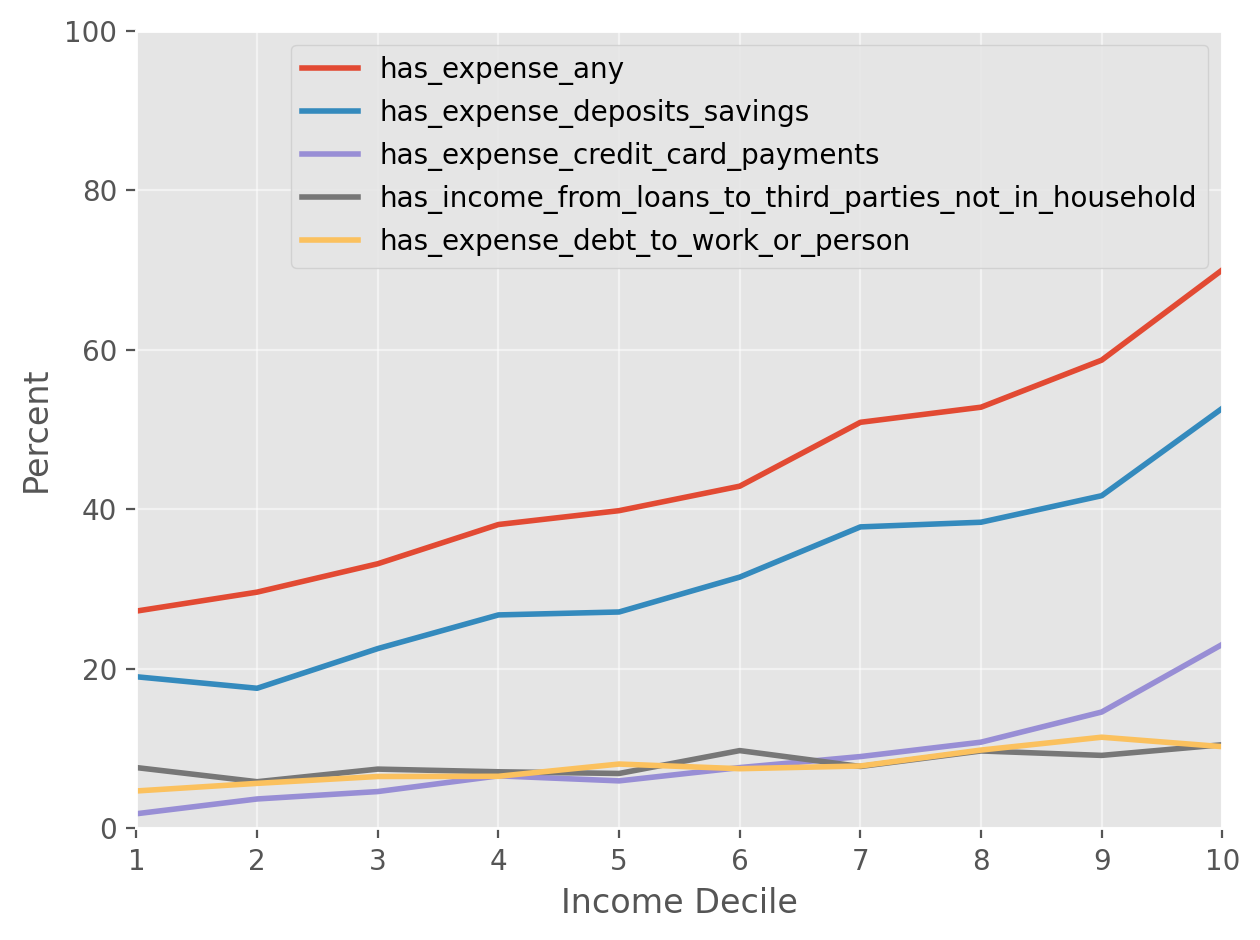

In [141]:
to_by_decile = ['has_expense_any',
                'has_expense_deposits_savings',
                'has_expense_credit_card_payments',
                'has_income_from_loans_to_third_parties_not_in_household',
                'has_expense_debt_to_work_or_person'
                ]

deciles = np.arange(1, 11)                

for x in to_by_decile:
    plt.plot(deciles, 100 * utils.indicator_by_decile(df, 'log_income_residual', x, 'weight'), label=x)
plt.legend()
plt.ylim(0, 100)
plt.xticks(np.arange(1, 11))

plt.xlabel('Income Decile')
plt.ylabel('Percent')

In [142]:
df['age_sq'] = df['age'] ** 2
C_education = pd.get_dummies(df['education'], prefix='education')
C_sex = pd.get_dummies(df['sex'], prefix='sex')
C_location_size = pd.get_dummies(df['location_size'], prefix='location_size')
C_Y = pd.get_dummies(df['Y'], prefix='Y')
C_decile = pd.get_dummies(df['decile'], prefix='decile')
C_location = pd.get_dummies(df['location'], prefix='location')

X_col = (['age', 'age_sq'] + list(C_education.columns) + list(C_sex.columns) + list(C_location_size.columns) +
         list(C_Y.columns) + list(C_decile.columns) + list(C_location.columns))
X_col = list(C_decile.columns)

df = pd.concat([df, C_education, C_sex, C_location_size, C_Y, C_location, C_decile], axis=1)

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

In [152]:
X = df[X_col]
Y = df['has_expense_any']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
logit.fit(X_train, Y_train, sample_weight=df.loc[X_train.index, 'weight'])

LogisticRegression()

In [153]:
print(logit.score(X_train, Y_train, sample_weight=df.loc[X_train.index, 'weight']))
print(logit.score(X_test, Y_test, sample_weight=df.loc[X_test.index, 'weight']))
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(Y_test, logit.predict(X_test), 
                                      average='binary'))

0.652906475090036
0.668348332090817
(0.6581306017925737, 0.3890991672975019, 0.48905803996194097, None)


(0.0, 1.0)

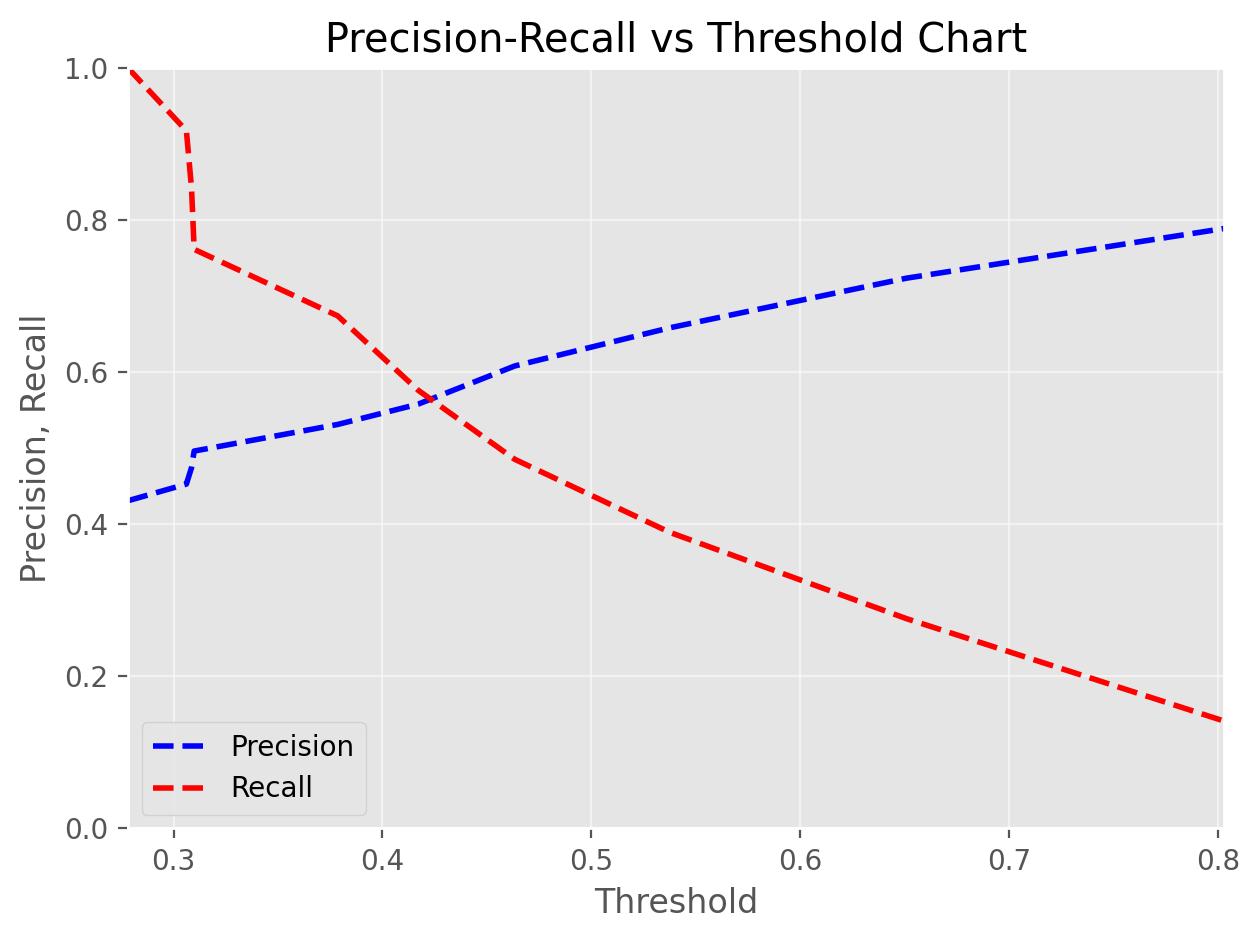

In [154]:
import sklearn
from sklearn.metrics import accuracy_score, precision_recall_curve
Y_pred = logit.predict(X_test)
probs = logit.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, probs[:, 1] )

pr_auc = sklearn.metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

<Axes: >

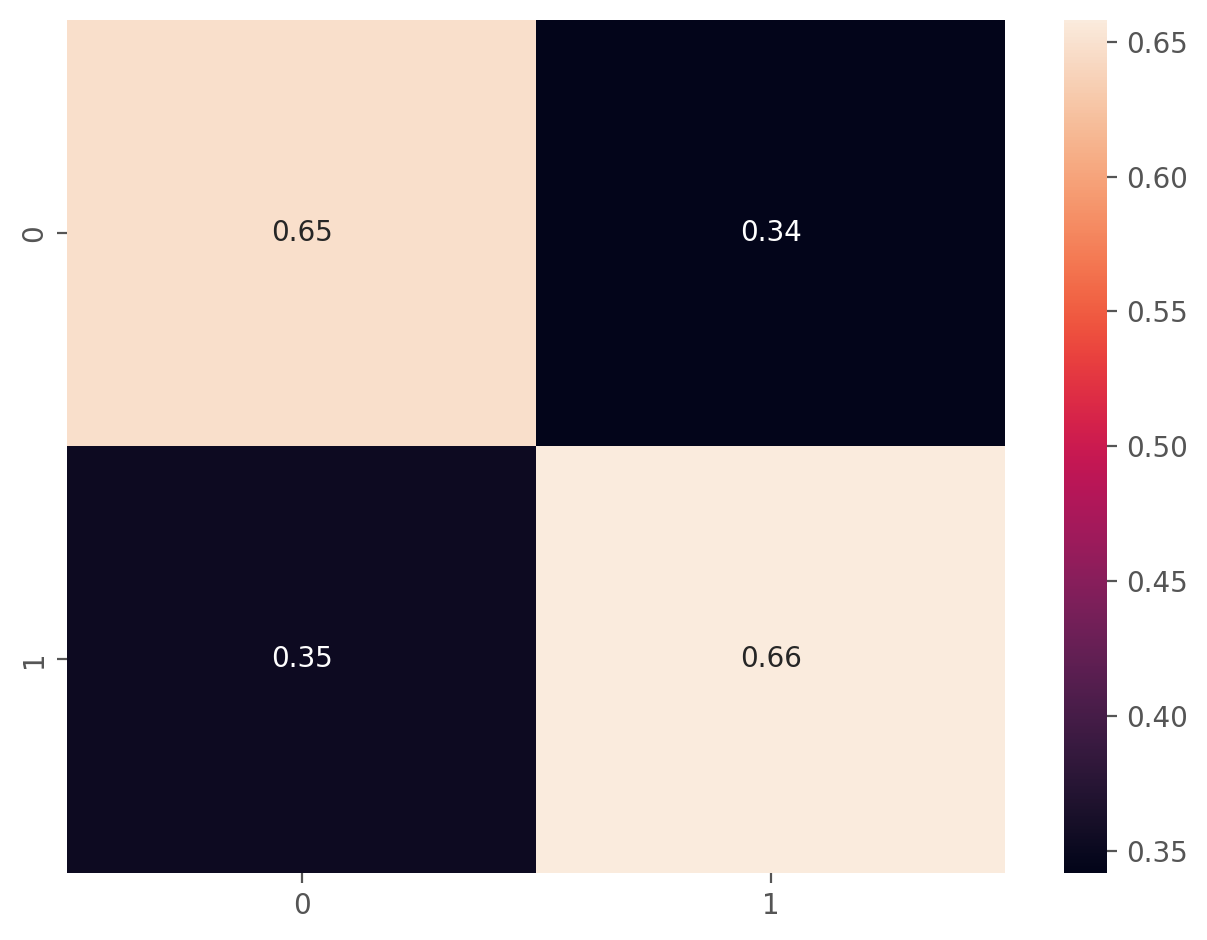

In [155]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Y_pred, normalize='pred')
sns.heatmap(confusion, annot=True)

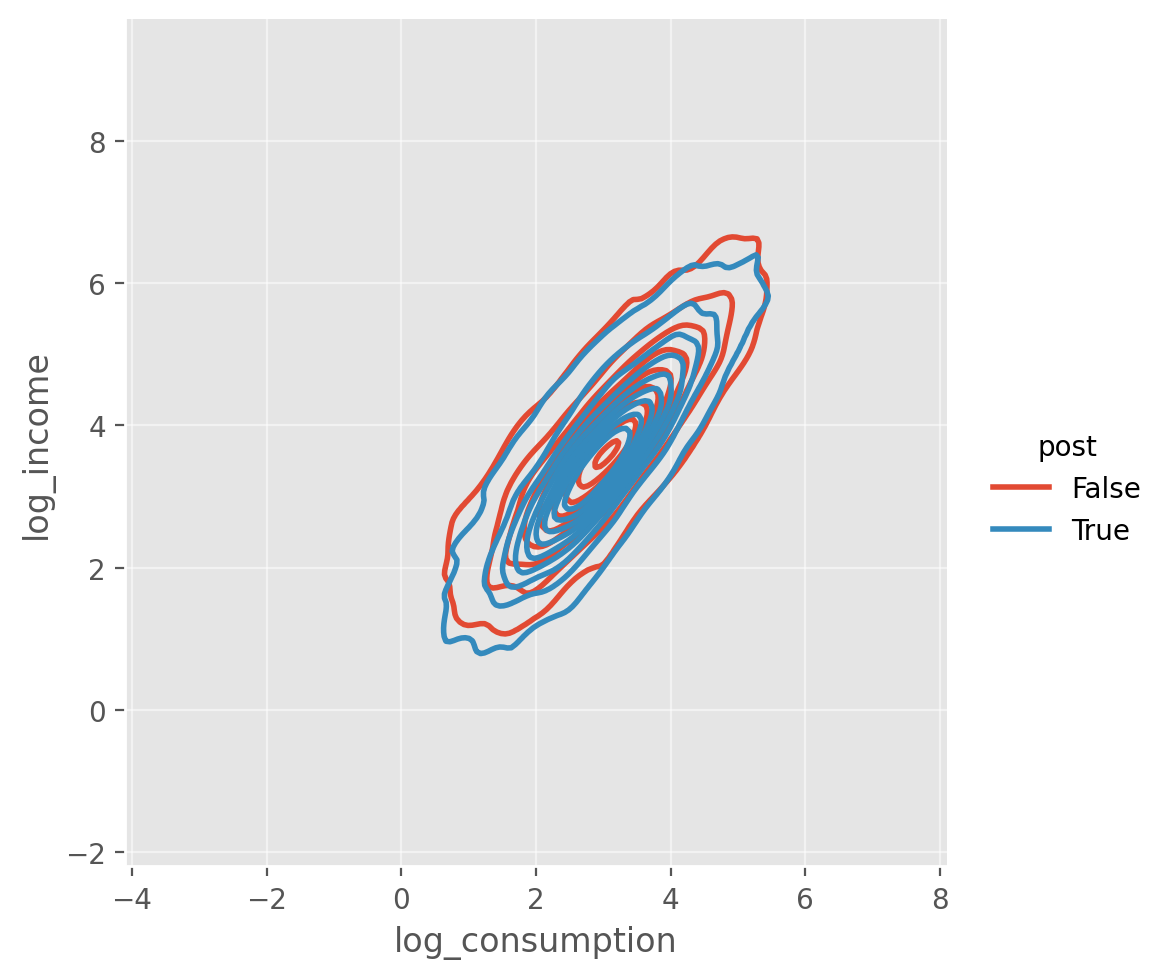

In [160]:
sns.displot(df, x='log_consumption', y='log_income', kind='kde', hue='post')

In [156]:
# turning this into something tangible: talk about introducing the 'threshold'
# selling this to people: using demographics as prediction mechanisms

In [190]:
aux = pd.crosstab(df.education, df.has_expense_deposits_savings, df.weight, aggfunc='sum', normalize='index')
aux

has_expense_deposits_savings,0.0,1.0
education,,
high,0.527562,0.472438
low,0.732653,0.267347
medium,0.657011,0.342989


In [194]:
aux = pd.crosstab(df.location_size, df.has_expense_any, df.weight, aggfunc='sum', normalize='index')
aux

has_expense_any,0,1
location_size,,
1,0.526152,0.473848
2,0.576324,0.423676
3,0.582553,0.417447
4,0.599119,0.400881


In [184]:
plt.bar()

sex,education,Female,Male
0,high,0.092456,0.907544
1,low,0.153798,0.846202
2,medium,0.113070,0.886930


In [178]:
aux.sum(axis=1)

education
high       4096294.0
low       18283254.0
medium     8336141.0
dtype: float64

In [157]:
df.groupby(['education'])['sex'].value_counts()

education  sex   
high       Male       2047
           Female      197
low        Male      11390
           Female     1829
medium     Male       4469
           Female      516
Name: count, dtype: int64